In [41]:
import pandas as pd
df = pd.read_csv('04_combine_all.tsv', sep='\t')

In [42]:
df.groupby('dept').size()

dept
STT_AB     75238
STT_CS     43868
STT_MV    241573
STT_NS     70768
STT_TT    361843
dtype: int64

In [43]:
df['char_len'] = df['uni'].str.len()

In [44]:
df['char_len'].describe()

count    793290.000000
mean         67.027925
std          49.280929
min           6.000000
25%          29.000000
50%          54.000000
75%          94.000000
max         393.000000
Name: char_len, dtype: float64

<Axes: >

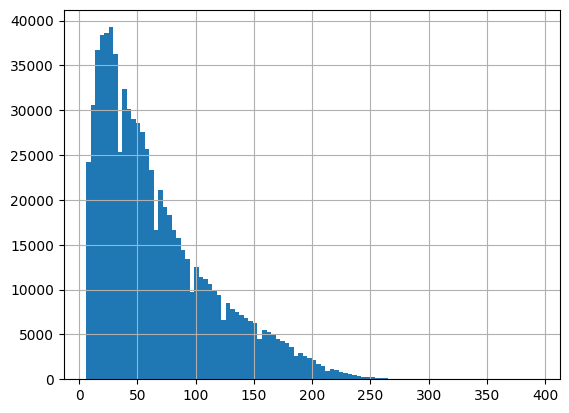

In [45]:
df['char_len'].hist(bins=100)

<Axes: >

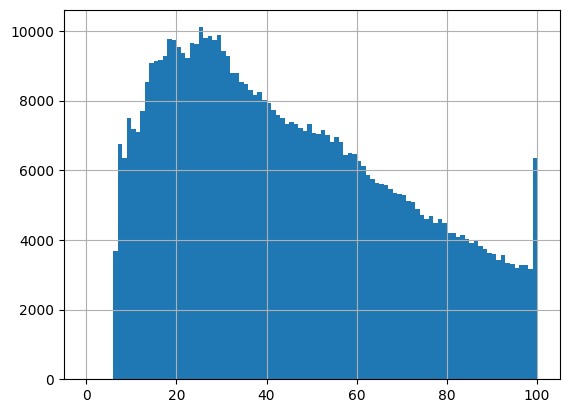

In [46]:
df['char_len'].hist(bins=100, range=(0, 100))

In [47]:
df = df[(df['char_len'] < 80) & (df['char_len'] > 15)]

In [48]:
df.groupby('dept').size()

dept
STT_AB     44373
STT_CS     18277
STT_MV    127287
STT_NS     16800
STT_TT    261561
dtype: int64

In [49]:
depts = df['dept'].unique()

In [50]:
benchmarks = []
for dept in depts:
    print(dept)
    df_dept = df[df['dept'] == dept]
    df_dept = df_dept.sort_values('grade', ascending=False)
    df_dept = df_dept[0:1000]
    benchmarks.append(df_dept)

STT_AB
STT_NS
STT_TT
STT_CS
STT_MV


In [51]:
benchmarks = pd.concat(benchmarks)

In [52]:
benchmarks.head()

,file_name,uni,wylie,url,dept,grade,char_len,audio_len
508001,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36,1.809
140116,STT_AB00225_0051_634428_to_636220,དེ་སྔ་ཡིན་ན་པད་ཁའི་མེ་ཏོག་གིས་,de snga yin na pad kha'i me tog gis _,https://huggingface.co/datasets/openpecha/STT_...,STT_AB,3,31,1.792
166480,STT_AB00277_0455_2502107_to_2503882,གཟུགས་སྐུ་སྤྱི་ཙམ་ལ་སྤྲུལ་སྐུ་དང་།,gzugs sku spyi tsam la sprul sku dang /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,35,1.775
541432,STT_AB00211_0052_282124_to_285981,སྐྱེ་བ་འདི་གཅིག་པུ་ཙམ་མ་ཡིན་པར། སྔོན་གྱི་སྐྱེ་...,skye ba 'di gcig pu tsam ma yin par/_sngon gyi...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,59,3.857
252345,STT_AB00166_0076_222690_to_224429,གཡུལ་འགྱེད་ཚེ་ན་གནོད་པ་མང་།།,g.yul 'gyed tshe na gnod pa mang //_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,29,1.739


In [53]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1000
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [54]:
sample = 3
for dept in depts:
    print(dept)
    df_dept = benchmarks[benchmarks['dept'] == dept]
    df_dept = df_dept.sample(frac=1)
    for i in range(0, sample):
        print(df_dept.iloc[i]['uni'], df_dept.iloc[i]['url'])

STT_AB
སངས་རྒྱས་འགྲུབ་བྱ་སྙམ་དུ་ཀུན་མཁྱེན་ཡིད་བྱེད་ན།།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_1985_6763540_to_6766578.wav
དེ་ལ་འདི་སྐད་ཅེས་ཀྱང་བཀའ་སྩལ་ཏོ།།རིགས་ཀྱི་བུ་ལེགས་སོ་ལེགས་སོ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_2491_9048745_to_9054206.mp3.wav
འདི་འདྲ་བ་བདག་གིས་རྙེད་པ་ནི་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_1994_6814087_to_6815759.wav
STT_NS
ད་ང་ཚོ་ནང་གི། ནང་ག་དུས་གཙང་མ་ཡོད་ན་ཡང། ཕྱི་ལོགས་ཛོར་བོ་ཡོད་ན། ཨོང་ཨོང་།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0084_0150_1140969_to_1146158.wav
ད་རྒན་བློ་བཟང་རྒྱལ་མཚན་མར་དོན་ཚ་རེད་བ། ཨེ་ནས། ངས་སྐད་ཆ་ཡིན། ཧེ་ཧེ། འོ་འོ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0177_0189_1610929_to_1614422.wav
ད་ལོ་ནི་ང་ཨེ་འདྲའི་མང་པོ་ཨེ་འདྲའི་བྲིས་ནས་ཨེ་འདྲའི་ཞེ་དྲག་ཞེ་དྲག་ད།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0198_0155_1408515_to_1412142.wav
STT_TT
ད་གྲངས་མེད་གཉིས་པའི་ཚོགས་རྫོགས་ནས། ད་དེ་ནས་དག་པ་ས་གསུམ་གྱི་ས་བརྒྱད་པའི་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_TT00035_

In [55]:
def parse_cs_file_name(code):
    
    try:
        # Split the code into parts
        parts = code.split('-')

        # Decode each part of the code
        
        data_type = {'X': 'non-designated', 'D': 'story-telling', 'L':'conversation'}.get(parts[1], 'Unknown')
        birth_year = parts[2][:4]
        gender = {'P': 'male', 'M': 'female', 'X': 'other'}.get(parts[3][:1], 'Unknown')
        location = {'D': 'Dharamsala', 'S': 'South India', 'L': 'Ladakh', 'N': 'Nepal'}.get(parts[4][:1], 'Unknown')
        education_type = parts[5][0]
        education_years = parts[5][1:3]
        grade_level = parts[6][:1]
        school_code = parts[7][:1]

        # Create a dictionary with the decoded values
        decoded = {
            'data_type': data_type,
            'birth_year': int(birth_year),
            'age': 2023 - int(birth_year),
            'gender': gender,
            'location': location,
            'education_type': education_type,
            'education_years': int(education_years),
            'grade_level': int(grade_level),
            'school_code': school_code
        }
    except:
        print(f'Error decoding {code}')
        return {}
    return decoded

# Example usage
codes = [
    'STT_CS-D-2016-M-D-B04-1-R-06_0017_147090_to_156979',
    'STT_CS-X-2014-M-D-B02-4-R-01_0110_1035711_to_1037787',
    'STT_CS-L-2014/2014-P/P-D/D-B03/B06-5/5-R/R-01_0129_1106637_to_1112914.mp3',
]

for code in codes:
    print(parse_cs_file_name(code))


{'data_type': 'story-telling', 'birth_year': 2016, 'age': 7, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 4, 'grade_level': 1, 'school_code': 'R'}
{'data_type': 'non-designated', 'birth_year': 2014, 'age': 9, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 2, 'grade_level': 4, 'school_code': 'R'}
{'data_type': 'conversation', 'birth_year': 2014, 'age': 9, 'gender': 'male', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 3, 'grade_level': 5, 'school_code': 'R'}


In [56]:
benchmarks_cs = benchmarks[benchmarks['dept'] == 'STT_CS']

In [57]:
benchmarks_cs_parsed = benchmarks_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
benchmarks_cs = pd.concat([benchmarks_cs, benchmarks_cs_parsed], axis=1)

In [58]:
benchmarks_cs.groupby('education_years').size()

education_years
1    268
2    244
3    124
4     73
5    114
6      1
7     93
8     51
9     32
dtype: int64

In [59]:
benchmarks_cs.groupby('school_code').size()

school_code
B      1
R    897
T    102
dtype: int64

In [60]:
df_cs = df[df['dept'] == 'STT_CS']

In [61]:
df_cs = df_cs.sort_values('grade', ascending=False)

In [62]:
df_cs_parsed = df_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
df_cs = pd.concat([df_cs, df_cs_parsed], axis=1)

Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0150_1172618_to_1175234
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0151_1177731_to_1186995
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0152_1193847_to_1197002
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0153_1201305_to_1203600
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0154_1214873_to_1219227
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0155_1221049_to_1224492
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0147_1149499_to_1152199
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0148_1160907_to_1167555
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0096_724350_to_727557
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0087_665507_to_668342
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0088_672173_to_674299
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01

In [63]:
df_cs.groupby('education_years').size()

education_years
0.0       9
1.0    2728
2.0    3686
3.0    2694
4.0    2971
5.0    2346
6.0    1509
7.0     750
8.0     688
9.0     414
dtype: int64

In [64]:
df_cs.groupby('school_code').size()

school_code
0        7
B       48
K       18
R    16364
T      649
Y      656
r       53
dtype: int64

In [65]:
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['education_years'] == 6][:100]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['education_years'] == 9][:60]])

In [66]:
benchmarks_cs.groupby('education_years').size()

education_years
1.0    268
2.0    244
3.0    124
4.0     73
5.0    114
6.0    101
7.0     93
8.0     51
9.0     92
dtype: int64

In [67]:
missing_school_codes = ['0','B','K','Y','r']

In [68]:
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == '0'][:7]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'B'][:40]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'K'][:10]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'Y'][:100]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'r'][:50]])

In [69]:
benchmarks_cs.groupby('school_code').size()

school_code
0       7
B      41
K      10
R    1057
T     102
Y     100
r      50
dtype: int64

In [70]:
benchmarks = pd.concat([benchmarks[benchmarks['dept'] != 'STT_CS'], benchmarks_cs])

In [71]:
benchmarks.shape

(5367, 17)

In [72]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1367
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [73]:
benchmarks[['file_name', 'uni', 'wylie', 'url', 'dept', 'grade', 'char_len']].head()

,file_name,uni,wylie,url,dept,grade,char_len
508001,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas _,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36
140116,STT_AB00225_0051_634428_to_636220,དེ་སྔ་ཡིན་ན་པད་ཁའི་མེ་ཏོག་གིས་,de snga yin na pad kha'i me tog gis _,https://huggingface.co/datasets/openpecha/STT_...,STT_AB,3,31
166480,STT_AB00277_0455_2502107_to_2503882,གཟུགས་སྐུ་སྤྱི་ཙམ་ལ་སྤྲུལ་སྐུ་དང་།,gzugs sku spyi tsam la sprul sku dang /_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,35
541432,STT_AB00211_0052_282124_to_285981,སྐྱེ་བ་འདི་གཅིག་པུ་ཙམ་མ་ཡིན་པར། སྔོན་གྱི་སྐྱེ་...,skye ba 'di gcig pu tsam ma yin par/_sngon gyi...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,59
252345,STT_AB00166_0076_222690_to_224429,གཡུལ་འགྱེད་ཚེ་ན་གནོད་པ་མང་།།,g.yul 'gyed tshe na gnod pa mang //_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,29


In [74]:
benchmarks[['file_name', 'uni', 'wylie', 'url', 'dept', 'grade', 'char_len']].to_csv('05_benchmarks.tsv', sep='\t', index=False)